In [19]:
from pandas import DataFrame
from datetime import datetime
from fmp_data import FMPPriceLoader

In [82]:
# Load house price data (3B)

county = 'San Mateo County'

raw = pd.read_csv('~/Downloads/house.csv')
data = raw[raw.RegionName == county].to_dict()


# Get all keys that can be parsed as dates
date_keys = [key for key in data.keys() if len(key.split('-')) == 3 and all(part.isdigit() for part in key.split('-'))]

# If you want to convert them to datetime objects:
house = {key: data[key][85] for key in date_keys if key <= '2024-11-22'}

house_all = {key: data[key][85] for key in date_keys}


In [76]:
# load SPX

pl = FMPPriceLoader()
spx = {}
for date in house.keys():
    spx[date] = pl.get_last_available_price('QQQ', date)[0]



In [77]:
house

{'2000-01-31': 408065.6654690189,
 '2000-02-29': 409976.9273188383,
 '2000-03-31': 412814.37764935,
 '2000-04-30': 418608.76404455054,
 '2000-05-31': 426758.0151213578,
 '2000-06-30': 436617.49118113733,
 '2000-07-31': 446441.5814018552,
 '2000-08-31': 455084.69758212473,
 '2000-09-30': 462751.91891754343,
 '2000-10-31': 470531.1256623168,
 '2000-11-30': 478784.5699858868,
 '2000-12-31': 487787.0143132464,
 '2001-01-31': 497143.9939687815,
 '2001-02-28': 505856.1224273437,
 '2001-03-31': 513335.9023983039,
 '2001-04-30': 519595.12454170635,
 '2001-05-31': 523493.3893199318,
 '2001-06-30': 524924.9620368676,
 '2001-07-31': 525235.3693650123,
 '2001-08-31': 526118.0030848064,
 '2001-09-30': 526546.1963763213,
 '2001-10-31': 525938.1291740261,
 '2001-11-30': 523150.93937957525,
 '2001-12-31': 519737.9915909839,
 '2002-01-31': 516264.2023950949,
 '2002-02-28': 514615.94435575063,
 '2002-03-31': 514826.9558972171,
 '2002-04-30': 517892.05935373326,
 '2002-05-31': 522384.2010925499,
 '2002-0

In [78]:
dates = sorted(house.keys())
spx_values = [spx[date] for date in dates]
house_values = [house[date] for date in dates]
data = pd.DataFrame({'date': dates, 'spx': spx_values, 'house': house_values})
data['spx_norm'] = np.log(data.spx / data.spx.iloc[0])
data['house_norm'] = np.log(data.house / data.house.iloc[0])
data['spx_r'] = np.log(data['spx'] / data['spx'].shift(1))
data['house_r'] = np.log(data['house'] / data['house'].shift(1))


data.head()



,date,spx,house,spx_norm,house_norm,spx_r,house_r
0,2000-01-31,76.62,408065.665469,0.000000,0.000000,NaN,NaN
1,2000-02-29,91.10,409976.927319,0.173100,0.004673,0.173100,0.004673
2,2000-03-31,93.23,412814.377649,0.196211,0.011570,0.023112,0.006897
3,2000-04-30,80.45,418608.764045,0.048778,0.025509,-0.147434,0.013939
4,2000-05-31,70.66,426758.015121,-0.080978,0.044789,-0.129756,0.019280


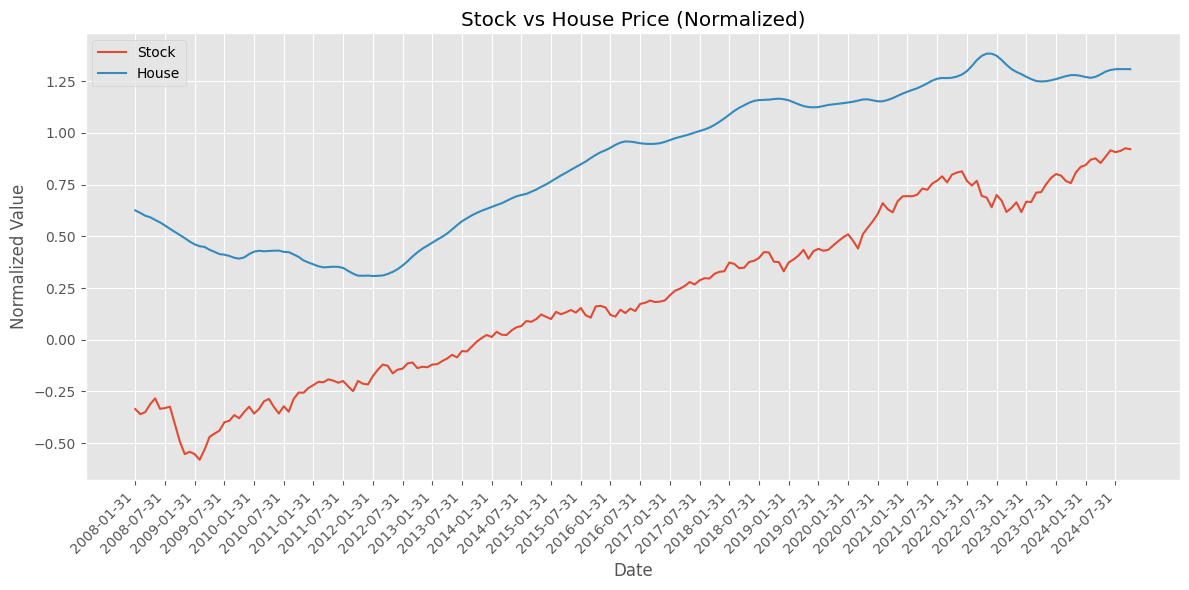

In [81]:
t = data[data.date >= '2008-01-01']
plt.figure(figsize=(12, 6))
plt.plot(t.date, t.spx_norm / 2, label='Stock')
plt.plot(t.date, t.house_norm, label='House')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Stock vs House Price (Normalized)')
plt.legend()
plt.xticks(t.date[::6], rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [83]:
ha = house_all

{'2000-01-31': 408065.6654690189,
 '2000-02-29': 409976.9273188383,
 '2000-03-31': 412814.37764935,
 '2000-04-30': 418608.76404455054,
 '2000-05-31': 426758.0151213578,
 '2000-06-30': 436617.49118113733,
 '2000-07-31': 446441.5814018552,
 '2000-08-31': 455084.69758212473,
 '2000-09-30': 462751.91891754343,
 '2000-10-31': 470531.1256623168,
 '2000-11-30': 478784.5699858868,
 '2000-12-31': 487787.0143132464,
 '2001-01-31': 497143.9939687815,
 '2001-02-28': 505856.1224273437,
 '2001-03-31': 513335.9023983039,
 '2001-04-30': 519595.12454170635,
 '2001-05-31': 523493.3893199318,
 '2001-06-30': 524924.9620368676,
 '2001-07-31': 525235.3693650123,
 '2001-08-31': 526118.0030848064,
 '2001-09-30': 526546.1963763213,
 '2001-10-31': 525938.1291740261,
 '2001-11-30': 523150.93937957525,
 '2001-12-31': 519737.9915909839,
 '2002-01-31': 516264.2023950949,
 '2002-02-28': 514615.94435575063,
 '2002-03-31': 514826.9558972171,
 '2002-04-30': 517892.05935373326,
 '2002-05-31': 522384.2010925499,
 '2002-0